In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Conversion to grayscale and blurring a bit
**Also keeping imfinal as copy for final plotting)**

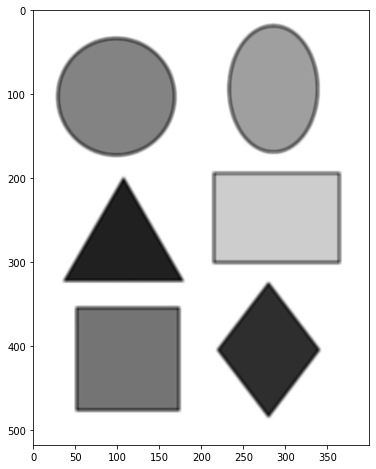

In [12]:
img = cv2.imread('/home/pranavkdas/shapes.jpg',0)
imfinal = cv2.imread('/home/pranavkdas/shapes.jpg',3)
img = cv2.blur(img,(5,5))
plt.figure(figsize=(8,8))
plt.imshow(img,'gray')
plt.show()

# Binary Thresholding

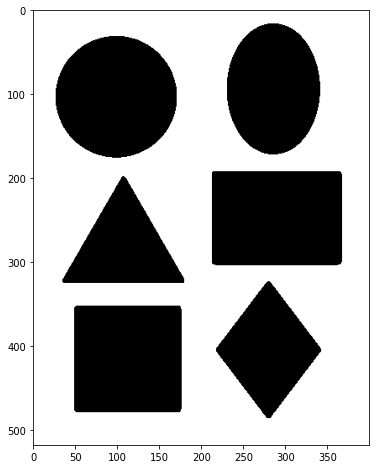

In [13]:
ret,thresh = cv2.threshold(img,230,255,cv2.THRESH_BINARY)
plt.figure(figsize=(8,8))
plt.imshow(thresh,'gray')
plt.show()

# Finding the contours

In [14]:
contours, _= cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
len(contours)

7

# Naming the shapes

In [16]:
for contour in contours[1:]:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    
    if len(approx) == 3:
        cv2.putText(imfinal, "Triangle", (x-100, y+20), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            cv2.putText(imfinal, "square", (x, y+150), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            l = tuple(contour[contour[:,:,0].argmin()][0])
            r = tuple(contour[contour[:,:,0].argmax()][0])
            t = tuple(contour[contour[:,:,1].argmin()][0])
            b = tuple(contour[contour[:,:,1].argmax()][0])
            left_to_right = sqrt(((l[0]-r[0])**2)+((l[1]-r[1])**2))
            top_to_bottom = sqrt(((t[0]-b[0])**2)+((t[1]-b[1])**2))
            tb_upper = top_to_bottom+5
            tb_lower = top_to_bottom-5
            lr_upper = left_to_right+5
            lr_lower = left_to_right-5
            if(((w>=lr_lower) and (w<=lr_upper)) and ((h>=tb_lower) and (h<=tb_upper))):
                cv2.putText(imfinal, "Diamond", (x+30, y+30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            else:
                cv2.putText(imfinal, "Rectangle", (x+100, y-10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    else:
        l = tuple(contour[contour[:,:,0].argmin()][0])
        r = tuple(contour[contour[:,:,0].argmax()][0])
        t = tuple(contour[contour[:,:,1].argmin()][0])
        b = tuple(contour[contour[:,:,1].argmax()][0])
        r1 = sqrt(((l[0]-r[0])**2)+((l[1]-r[1])**2))
        r2 = sqrt(((t[0]-b[0])**2)+((t[1]-b[1])**2))
        a = max(r1,r2)
        b = min(r1,r2)
        if((float(b)/a)>=0.9):
            cv2.putText(imfinal, "Circle", (x-12, y-8), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            cv2.putText(imfinal, "Oval", (x+50, y+6), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))

1.0
0.7696969696969697
1.3805309734513274


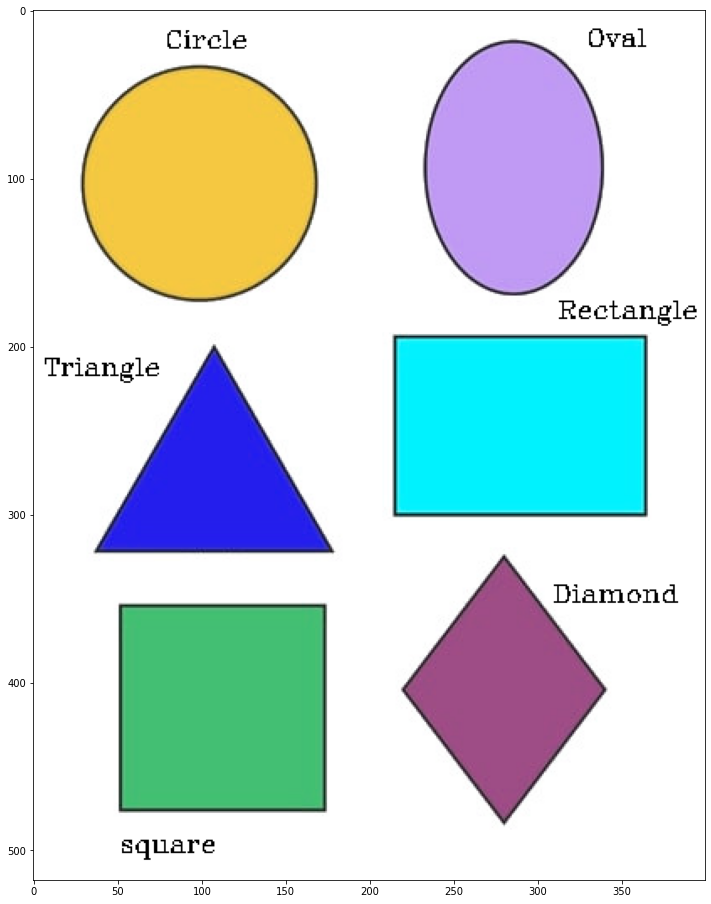

In [17]:
plt.figure(figsize=(16,16))
plt.imshow(imfinal,'gray')
plt.show()